In [ ]:
import numpy as np
import cv2
# Load an color image in grayscale
img = cv2.imread('shin.jpg',0)

cv2.imshow('shin_cat',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.namedWindow('shin_cat', cv2.WINDOW_NORMAL)
cv2.imshow('shin_cat',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
cv2.imwrite('shingray.png',img)

In [ ]:
img = cv2.imread('shin.jpg',0)
cv2.imshow('shin_cat',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('shingray.png',img)
    cv2.destroyAllWindows()


In [ ]:
from matplotlib import pyplot as plt

img = cv2.imread('shin.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


In [ ]:
import numpy as np
import cv2

#0은 첫번째 카메라가 열리는 것
#노트북의 경우 내장카메라=0, 외부 연결된 카메라=1
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #그림 그리기 추가
    # Create a black image
    img = np.zeros((512,512,3), np.uint8)
    # 파란색 5픽셀짜리 대각선
    img = cv2.line(img,(0,0),(511,511),(0,0,255),5)
    img = cv2.line(img,(511,0),(0,511),(0,255,0),3)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        # When everything done, release the capture
        cap.release()
cv2.destroyAllWindows()


In [ ]:
cap = cv2.VideoCapture('babyShin.avi')

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [116]:
# 검정 화면의 이미지 만들기
img = np.zeros((512,512,3), np.uint8)
# 파란색 5픽셀짜리 대각선, 초록색 3픽셀 대각선
img = cv2.line(img,(0,0),(511,511),(0,0,255),5)
img = cv2.line(img,(511,0),(0,511),(0,255,0),3)
#오른쪽 상단 초록색 빈 사각형
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
#오른쪽 상단 빨간색 원
img = cv2.circle(img,(447,63), 63, (255,0,0), -1)
#중앙 파란색 반타원
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,(0,0,255),-1)
#왼쪽 위 도형
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(255,255,0))
#Open CV 글자 
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

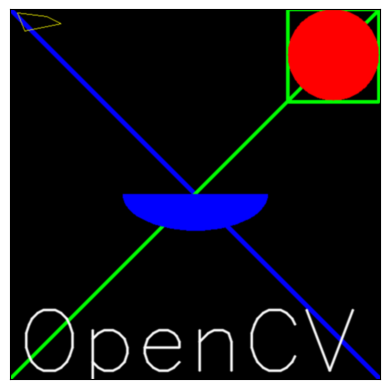

In [118]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [145]:
import cv2
import numpy as np
import random

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Mouse callback function
def draw_random_circle(event, x, y, flags, param):
    # Generate a random radius between 10 and 100
    if event == cv2.EVENT_LBUTTONDOWN:        
        radius = random.randint(10, 100)
        # Generate random BGR color
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.circle(img, (x, y), radius, color, -1)

# Create a window and bind the function to the window
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_random_circle)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:  # Press 'Esc' key to exit
        break

cv2.destroyAllWindows()

In [148]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [143]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()
